In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time

In [2]:
team_A = pd.read_excel('team_specific_matrix/Washington St._A.xlsx', index_col = 'Starting_State')
team_B = pd.read_excel('team_specific_matrix/Arizona St._B.xlsx', index_col = 'Starting_State')

In [3]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [31]:
abc = simulate_game(transition_matrix, num_games=10, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Game number 1
First Half Result: 
   Team_A_Final Team_B_Final
18           35           38


 10%|█         | 1/10 [00:06<00:58,  6.45s/it]

Game number 1
Final score: 85 - 78
Game number 2
First Half Result: 
   Team_A_Final Team_B_Final
29           33           42


 20%|██        | 2/10 [00:14<00:58,  7.32s/it]

Game number 2
Final score: 76 - 79
Game number 3
First Half Result: 
   Team_A_Final Team_B_Final
17           41           37


 30%|███       | 3/10 [00:21<00:49,  7.12s/it]

Game number 3
Final score: 73 - 74
Game number 4
First Half Result: 
   Team_A_Final Team_B_Final
32           39           38


 40%|████      | 4/10 [00:28<00:42,  7.07s/it]

Game number 4
Final score: 71 - 74
Game number 5
First Half Result: 
   Team_A_Final Team_B_Final
36           38           49


 50%|█████     | 5/10 [00:35<00:35,  7.12s/it]

Game number 5
Final score: 72 - 86
Game number 6
First Half Result: 
  Team_A_Final Team_B_Final
4           28           32


 60%|██████    | 6/10 [00:41<00:27,  6.84s/it]

Game number 6
Final score: 75 - 66
Game number 7
First Half Result: 
   Team_A_Final Team_B_Final
11           37           31


 70%|███████   | 7/10 [00:48<00:20,  6.71s/it]

Game number 7
Final score: 84 - 61
Game number 8
First Half Result: 
   Team_A_Final Team_B_Final
32           41           31
Game number 8
Tied at 70 - 70 after regulation
Game number 8
Tied at 91 - 91 after overtime 1


 80%|████████  | 8/10 [00:58<00:15,  7.78s/it]

Game number 8
Final score: 107 - 103
Game number 9
First Half Result: 
   Team_A_Final Team_B_Final
27           33           45


 90%|█████████ | 9/10 [01:04<00:07,  7.38s/it]

Game number 9
Final score: 63 - 72
Game number 10
First Half Result: 
   Team_A_Final Team_B_Final
11           42           46


100%|██████████| 10/10 [01:11<00:00,  7.13s/it]

Game number 10
Final score: 84 - 85


In [6]:
abc[1]

[(71, 75),
 (81, 76),
 (65, 72),
 (80, 69),
 (70, 82),
 (108, 106),
 (71, 80),
 (91, 58),
 (89, 78),
 (77, 89),
 (84, 71),
 (77, 85),
 (77, 65),
 (84, 75),
 (72, 86),
 (77, 84),
 (88, 70),
 (85, 69),
 (86, 72),
 (86, 78),
 (62, 71),
 (88, 87),
 (89, 65),
 (73, 70),
 (82, 72),
 (92, 69),
 (97, 43),
 (76, 86),
 (79, 82),
 (86, 76),
 (77, 72),
 (79, 89),
 (81, 82),
 (95, 69),
 (79, 93),
 (77, 79),
 (78, 85),
 (69, 84),
 (71, 75),
 (80, 78),
 (59, 67),
 (83, 78),
 (74, 66),
 (94, 58),
 (80, 81),
 (85, 80),
 (68, 76),
 (78, 87),
 (74, 83),
 (81, 75),
 (74, 58),
 (90, 91),
 (78, 88),
 (81, 78),
 (67, 84),
 (80, 79),
 (76, 93),
 (69, 71),
 (71, 75),
 (92, 70),
 (70, 78),
 (83, 88),
 (70, 68),
 (91, 77),
 (87, 82),
 (101, 78),
 (97, 74),
 (98, 62),
 (76, 81),
 (67, 86),
 (73, 96),
 (68, 78),
 (80, 84),
 (82, 79),
 (102, 61),
 (65, 62),
 (92, 72),
 (65, 74),
 (75, 66),
 (94, 102),
 (87, 75),
 (59, 83),
 (76, 68),
 (69, 88),
 (96, 59),
 (89, 90),
 (76, 95),
 (85, 62),
 (71, 77),
 (88, 57),
 (87,

In [8]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

In [9]:
from matplotlib import pyplot as plt

(array([ 2.,  6.,  8., 18., 13.,  9., 16., 10.,  3.,  7.,  1.,  2.,  3.,
         1.,  0.,  1.]),
 array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,
         30.,  35.,  40.,  45.,  50.,  55.]),
 <BarContainer object of 16 artists>)

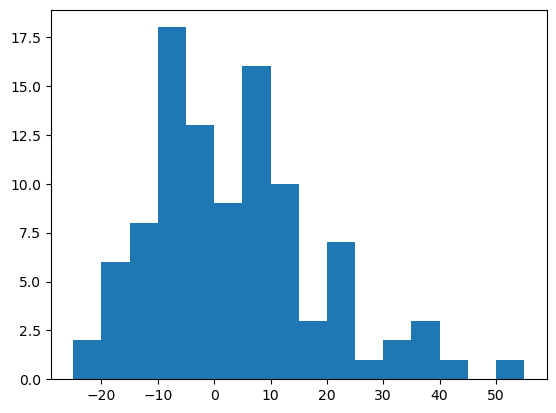

In [11]:
plt.hist(margins, bins=np.linspace(-25,55,17))

In [14]:
abc[0]

,Transition,Team_A,Team_B,Time,Period,Team_A_Final,Team_B_Final,Game Number
0,"(Bi0, Br0)",0,0,1200,1,0,0,100
1,"(Br0, Ai2)",0,2,1195,1,0,2,100
2,"(Ai2, Br0)",0,0,1177,1,0,2,100
3,"(Br0, Bi0)",0,0,1168,1,0,2,100
4,"(Bi0, Ar0)",0,0,1150,1,0,2,100
...,...,...,...,...,...,...,...,...
217,"(Br0, Ai2)",0,2,28,2,84,80,100
218,"(Ai2, Af0)",0,0,13,2,84,80,100
219,"(Af0, Af1)",1,0,13,2,85,80,100
220,"(Af1, Bi1)",1,0,13,2,86,80,100


In [18]:
cc = abc[0].copy()
cc['marg'] = cc['Team_A_Final']-cc['Team_B_Final']

In [19]:
cc[cc['marg']>50]

,Transition,Team_A,Team_B,Time,Period,Team_A_Final,Team_B_Final,Game Number,marg
210,"(Ar0, Bi3)",3,0,197,2,89,38,100,51
211,"(Bi3, Ar0)",0,0,170,2,89,38,100,51
212,"(Ar0, Bi2)",2,0,167,2,91,38,100,53
213,"(Bi2, Ar0)",0,0,149,2,91,38,100,53
214,"(Ar0, Br0)",0,0,140,2,91,38,100,53
215,"(Br0, Ar0)",0,0,127,2,91,38,100,53
216,"(Ar0, Br0)",0,0,119,2,91,38,100,53
217,"(Br0, Ar0)",0,0,112,2,91,38,100,53
218,"(Ar0, Br0)",0,0,103,2,91,38,100,53
219,"(Br0, Ar0)",0,0,92,2,91,38,100,53


In [21]:
a_scores = []
b_scores = []

for item in abc[1]:
    a_scores.append(item[0])
    b_scores.append(item[1])

In [22]:
np.mean(a_scores)

79.71

In [23]:
np.mean(b_scores)

76.7

In [30]:
(pd.Series(margins)>0).value_counts(dropna=False)

True     53
False    47
dtype: int64